# Import Required Libraries
Import necessary libraries such as pandas, matplotlib, and any other required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import datetime

# Load Book Database
Load the book database from a CSV file into a pandas DataFrame.

In [2]:
book_data = pd.read_csv('book_database.csv')

# View Available Books
Display the list of available books with their details.

In [3]:
def view_available_books():
    print(book_data.to_string(index=False))


view_available_books()

Book ID                                 Title              Author              Genre  Price  Stock  Rating
BK-1001                    The Silent Patient    Alex Michaelides            Fiction  15.99     20     4.7
BK-1002               Where the Crawdads Sing         Delia Owens            Mystery  12.99     15     4.6
BK-1003                              Becoming      Michelle Obama          Biography  18.50     30     4.8
BK-1004                              Educated       Tara Westover        Non-Fiction  13.99     10     4.7
BK-1005   The Subtle Art of Not Giving a F*ck         Mark Manson          Self-Help  10.99     25     4.5
BK-1006                         Atomic Habits         James Clear          Self-Help  11.50     35     4.9
BK-1007                                 Circe     Madeline Miller            Fantasy  16.00     18     4.6
BK-1008               Little Fires Everywhere          Celeste Ng            Fiction  14.75     12     4.4
BK-1009                      The Nigh

# Search Books
Implement search functionality to find books by title, author, genre, or rating.

In [4]:
def search_books(search_by, search_value):
    if search_by not in ['Title', 'Author', 'Genre', 'Rating']:
        print("Invalid search criteria. Please search by 'Title', 'Author', 'Genre', or 'Rating'.")
        return

    if search_by == 'Rating':
        search_value = float(search_value)
        result = book_data[book_data[search_by] >= search_value]
    else:
        result = book_data[book_data[search_by].str.contains(search_value, case=False, na=False)]

    if not result.empty:
        print(result.to_string(index=False))
    else:
        print("No books found matching the search criteria.")

# Example
search_books('Title', 'Harry Potter')
search_books('Author', 'Stephen King')
search_books('Genre', 'Fantasy')
search_books('Rating', '4.8')

Book ID                                 Title       Author   Genre  Price  Stock  Rating
BK-1031 Harry Potter and the Sorcerer's Stone J.K. Rowling Fantasy  10.99     35     4.9
Book ID        Title       Author  Genre  Price  Stock  Rating
BK-1040  The Shining Stephen King Horror  13.99     12     4.7
BK-1041           It Stephen King Horror  14.50     10     4.6
BK-1042       Misery Stephen King Horror  12.99     15     4.5
BK-1043 Pet Sematary Stephen King Horror  11.50     20     4.4
BK-1044    The Stand Stephen King Horror  18.99      8     4.7
Book ID                                 Title           Author   Genre  Price  Stock  Rating
BK-1007                                 Circe  Madeline Miller Fantasy  16.00     18     4.6
BK-1009                      The Night Circus Erin Morgenstern Fantasy  13.50     20     4.3
BK-1030                      The Hunger Games  Suzanne Collins Fantasy  12.50     25     4.8
BK-1031 Harry Potter and the Sorcerer's Stone     J.K. Rowling Fantasy  

# Add Books to Cart
Allow users to add selected books to a virtual cart.

In [5]:
cart = []

def add_to_cart(book_id, quantity):
    if book_id not in book_data['Book ID'].values:
        print("Invalid Book ID. Please try again.")
        return


    book = book_data[book_data['Book ID'] == book_id].iloc[0]


    if quantity > book['Stock']:
        print(f"Requested quantity exceeds available stock. Available stock: {book['Stock']}")
        return


    cart.append({
        'Book ID': book_id,
        'Title': book['Title'],
        'Author': book['Author'],
        'Genre': book['Genre'],
        'Price': book['Price'],
        'Quantity': quantity,
        'Total Price': book['Price'] * quantity
    })

    book_data.loc[book_data['Book ID'] == book_id, 'Stock'] -= quantity

    print(f"Added {quantity} copies of '{book['Title']}' to the cart.")

# Example
add_to_cart('BK-1001', 2)
add_to_cart('BK-1031', 1)

# Display the cart contents
def view_cart():
    if not cart:
        print("Your cart is empty.")
    else:
        cart_df = pd.DataFrame(cart)
        print(cart_df.to_string(index=False))

#view the cart
view_cart()

Added 2 copies of 'The Silent Patient' to the cart.
Added 1 copies of 'Harry Potter and the Sorcerer's Stone' to the cart.
Book ID                                 Title           Author   Genre  Price  Quantity  Total Price
BK-1001                    The Silent Patient Alex Michaelides Fiction  15.99         2        31.98
BK-1031 Harry Potter and the Sorcerer's Stone     J.K. Rowling Fantasy  10.99         1        10.99


# Calculate Total Price with Discounts
Calculate the total price of the books in the cart, applying discounts if applicable.

In [6]:
def calculate_total_price(cart):

    cart_df = pd.DataFrame(cart)
    total_price = cart_df['Total Price'].sum()

    # Apply a 10% discount if the total price exceeds $50
    if total_price > 50:
        discount = total_price * 0.10
        total_price -= discount
        print(f"A 10% discount of ${discount:.2f} has been applied.")

    print(f"The total price of the books in your cart is: ${total_price:.2f}")
    return total_price

# Example
total_price = calculate_total_price(cart)

The total price of the books in your cart is: $42.97


# Update Stock After Purchase
Update the stock of books after a purchase is made.

In [7]:
def update_stock_after_purchase(cart):
    for item in cart:
        book_id = item['Book ID']
        quantity_purchased = item['Quantity']

    book_data.loc[book_data['Book ID'] == book_id, 'Stock'] -= quantity_purchased

    print("Stock updated after purchase.")

# Example
update_stock_after_purchase(cart)

# Verify the stock update by viewing the available books
view_available_books()

Stock updated after purchase.
Book ID                                 Title              Author              Genre  Price  Stock  Rating
BK-1001                    The Silent Patient    Alex Michaelides            Fiction  15.99     18     4.7
BK-1002               Where the Crawdads Sing         Delia Owens            Mystery  12.99     15     4.6
BK-1003                              Becoming      Michelle Obama          Biography  18.50     30     4.8
BK-1004                              Educated       Tara Westover        Non-Fiction  13.99     10     4.7
BK-1005   The Subtle Art of Not Giving a F*ck         Mark Manson          Self-Help  10.99     25     4.5
BK-1006                         Atomic Habits         James Clear          Self-Help  11.50     35     4.9
BK-1007                                 Circe     Madeline Miller            Fantasy  16.00     18     4.6
BK-1008               Little Fires Everywhere          Celeste Ng            Fiction  14.75     12     4.4
BK-1009

# Generate Receipt
Generate a receipt displaying purchased books, their prices, and the total amount.

In [8]:
def generate_receipt(cart, total_price):
    if not cart:
        print("Your cart is empty. No receipt to generate.")
        return

    cart_df = pd.DataFrame(cart)

    receipt = f"Receipt - {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n"
    receipt += "-" * 50 + "\n"
    receipt += cart_df.to_string(index=False) + "\n"
    receipt += "-" * 50 + "\n"
    receipt += f"Total Amount: ${total_price:.2f}\n"


    print(receipt)

# Example
generate_receipt(cart, total_price)

Receipt - 2025-01-29 01:28:32
--------------------------------------------------
Book ID                                 Title           Author   Genre  Price  Quantity  Total Price
BK-1001                    The Silent Patient Alex Michaelides Fiction  15.99         2        31.98
BK-1031 Harry Potter and the Sorcerer's Stone     J.K. Rowling Fantasy  10.99         1        10.99
--------------------------------------------------
Total Amount: $42.97



# Rate and Review Books
Allow users to rate and review books after purchase, and save these reviews.

In [9]:
reviews = []


def rate_and_review(book_id, rating, review):
    if book_id not in book_data['Book ID'].values:
        print("Invalid Book ID. Please try again.")
        return

    if rating < 1 or rating > 5:
        print("Invalid rating. Please provide a rating between 1 and 5.")
        return

    reviews.append({
        'Book ID': book_id,
        'Rating': rating,
        'Review': review
    })

    book_reviews = [r['Rating'] for r in reviews if r['Book ID'] == book_id]
    average_rating = sum(book_reviews) / len(book_reviews)
    book_data.loc[book_data['Book ID'] == book_id, 'Rating'] = average_rating

    print(f"Thank you for reviewing '{book_data.loc[book_data['Book ID'] == book_id, 'Title'].values[0]}'.")

# Example
rate_and_review('BK-1001', 5, "Amazing book! Highly recommend.")
rate_and_review('BK-1031', 4, "Great read, but a bit slow in the middle.")

# Display all reviews
def view_reviews():
    if not reviews:
        print("No reviews available.")
    else:
        reviews_df = pd.DataFrame(reviews)
        print(reviews_df.to_string(index=False))


view_reviews()

Thank you for reviewing 'The Silent Patient'.
Thank you for reviewing 'Harry Potter and the Sorcerer's Stone'.
Book ID  Rating                                    Review
BK-1001       5           Amazing book! Highly recommend.
BK-1031       4 Great read, but a bit slow in the middle.


# Track Total Sales
Track total sales and maintain sales records.

In [10]:
sales_records = []

def track_total_sales(cart, total_price):
    sales_id = f"SALE-{len(sales_records) + 1:04d}"

    sale = {
        'Sales ID': sales_id,
        'Date': datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'Total Price': total_price,
        'Books': cart
    }

    sales_records.append(sale)

    print(f"Sale recorded with Sales ID: {sales_id}")

# Example
track_total_sales(cart, total_price)

# Display all sales records
def view_sales_records():
    if not sales_records:
        print("No sales records available.")
    else:
        for sale in sales_records:
            print(f"Sales ID: {sale['Sales ID']}")
            print(f"Date: {sale['Date']}")
            print(f"Total Price: ${sale['Total Price']:.2f}")
            print("Books Purchased:")
            for book in sale['Books']:
                print(f"  - {book['Title']} (Quantity: {book['Quantity']}, Total Price: ${book['Total Price']:.2f})")
            print("-" * 50)

# Call the function to view all sales records
view_sales_records()

Sale recorded with Sales ID: SALE-0001
Sales ID: SALE-0001
Date: 2025-01-29 01:28:32
Total Price: $42.97
Books Purchased:
  - The Silent Patient (Quantity: 2, Total Price: $31.98)
  - Harry Potter and the Sorcerer's Stone (Quantity: 1, Total Price: $10.99)
--------------------------------------------------


# Generate Sales Reports
Generate reports on most purchased books, total revenue, and sales trends by genre.

Most Purchased Books:
                                Title  Quantity
                   The Silent Patient         2
Harry Potter and the Sorcerer's Stone         1
Total Revenue from 2023-01-01 to 2023-12-31: $0.00


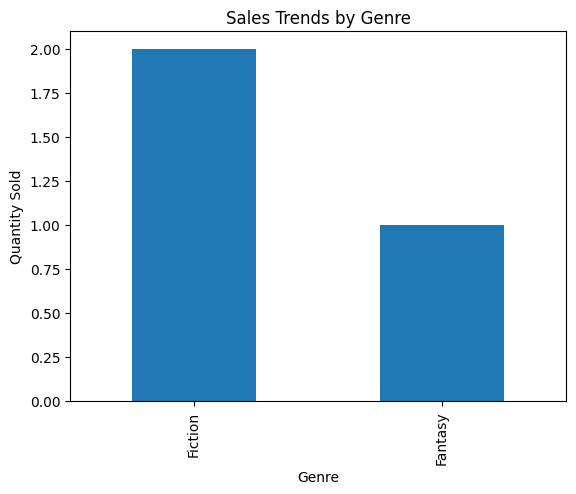

In [11]:
def most_purchased_books(sales_records):
    book_sales = {}
    for sale in sales_records:
        for book in sale['Books']:
            if book['Book ID'] in book_sales:
                book_sales[book['Book ID']]['Quantity'] += book['Quantity']
            else:
                book_sales[book['Book ID']] = {
                    'Title': book['Title'],
                    'Quantity': book['Quantity']
                }

    book_sales_df = pd.DataFrame(book_sales.values())

    book_sales_df = book_sales_df.sort_values(by='Quantity', ascending=False)

    print("Most Purchased Books:")
    print(book_sales_df.to_string(index=False))

most_purchased_books(sales_records)

def total_revenue(sales_records, start_date, end_date):
    total_revenue = 0
    for sale in sales_records:
        sale_date = datetime.datetime.strptime(sale['Date'], '%Y-%m-%d %H:%M:%S')
        if start_date <= sale_date <= end_date:
            total_revenue += sale['Total Price']

    print(f"Total Revenue from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}: ${total_revenue:.2f}")

# Example
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 12, 31)
total_revenue(sales_records, start_date, end_date)

# Function to generate a report on sales trends by genre
def sales_trends_by_genre(sales_records):
    genre_sales = {}
    for sale in sales_records:
        for book in sale['Books']:
            if book['Genre'] in genre_sales:
                genre_sales[book['Genre']] += book['Quantity']
            else:
                genre_sales[book['Genre']] = book['Quantity']

    # Convert the genre_sales dictionary to a DataFrame
    genre_sales_df = pd.DataFrame(list(genre_sales.items()), columns=['Genre', 'Quantity'])

    # Plot the sales trends by genre
    genre_sales_df.plot(kind='bar', x='Genre', y='Quantity', legend=False)
    plt.title('Sales Trends by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Quantity Sold')
    plt.show()

# Example usage of the sales_trends_by_genre function
sales_trends_by_genre(sales_records)

# Recommendation System (Optional)
Implement a recommendation system to suggest books based on genre or user ratings.

In [12]:
def recommend_books_by_genre(genre, top_n=5):
    # Filter books by the specified genre
    genre_books = book_data[book_data['Genre'].str.contains(genre, case=False, na=False)]

    # Sort the books by rating in descending order
    genre_books = genre_books.sort_values(by='Rating', ascending=False)

    # Get the top N books
    recommendations = genre_books.head(top_n)

    # Display the recommended books
    if not recommendations.empty:
        print(f"Top {top_n} books in the genre '{genre}':")
        print(recommendations[['Title', 'Author', 'Rating']].to_string(index=False))
    else:
        print(f"No books found in the genre '{genre}'.")

# Example
recommend_books_by_genre('Fantasy')
recommend_books_by_genre('Science Fiction')

# Function to recommend books based on user ratings
def recommend_books_by_ratings(min_rating=4.5, top_n=5):
    # Filter books by the minimum rating
    high_rated_books = book_data[book_data['Rating'] >= min_rating]

    # Sort the books by rating in descending order
    high_rated_books = high_rated_books.sort_values(by='Rating', ascending=False)

    # Get the top N books
    recommendations = high_rated_books.head(top_n)

    # Display the recommended books
    if not recommendations.empty:
        print(f"Top {top_n} books with a rating of {min_rating} or higher:")
        print(recommendations[['Title', 'Author', 'Rating']].to_string(index=False))
    else:
        print(f"No books found with a rating of {min_rating} or higher.")

# Example
recommend_books_by_ratings(4.8)
recommend_books_by_ratings(4.7)

Top 5 books in the genre 'Fantasy':
                Title          Author  Rating
The Lord of the Rings  J.R.R. Tolkien     4.9
           The Hobbit  J.R.R. Tolkien     4.8
     The Hunger Games Suzanne Collins     4.8
                Circe Madeline Miller     4.6
             Twilight Stephenie Meyer     4.4
Top 5 books in the genre 'Science Fiction':
          Title        Author  Rating
           Dune Frank Herbert     4.6
      Divergent Veronica Roth     4.5
Brave New World Aldous Huxley     4.4
Top 5 books with a rating of 4.8 or higher:
                Title           Author  Rating
   The Silent Patient Alex Michaelides     5.0
        Atomic Habits      James Clear     4.9
To Kill a Mockingbird       Harper Lee     4.9
The Lord of the Rings   J.R.R. Tolkien     4.9
      Charlotte's Web       E.B. White     4.9
Top 5 books with a rating of 4.7 or higher:
                Title           Author  Rating
   The Silent Patient Alex Michaelides     5.0
To Kill a Mockingbird       

# Membership System (Optional)
Add a loyalty program where frequent buyers receive additional discounts.

In [13]:
memberships = []

# Function to add a new member to the loyalty program
def add_member(member_id, name, email):
    if any(member['Member ID'] == member_id for member in memberships):
        print("Member ID already exists. Please use a unique Member ID.")
        return

    # Add the new member to the memberships list
    memberships.append({
        'Member ID': member_id,
        'Name': name,
        'Email': email,
        'Total Purchases': 0,
        'Discount': 0
    })

    print(f"Member '{name}' added to the loyalty program.")

def update_member_purchases(member_id, purchase_amount):
    for member in memberships:
        if member['Member ID'] == member_id:
            member['Total Purchases'] += purchase_amount
            if member['Total Purchases'] > 200:
                member['Discount'] = 0.15  # 15% discount
            elif member['Total Purchases'] > 100:
                member['Discount'] = 0.10  # 10% discount
            elif member['Total Purchases'] > 50:
                member['Discount'] = 0.05  # 5% discount
            print(f"Updated total purchases for member '{member['Name']}' to ${member['Total Purchases']:.2f}. Current discount: {member['Discount']*100:.0f}%")
            return
    print("Member ID not found. Please check the Member ID and try again.")

def apply_member_discount(member_id, total_price):
    for member in memberships:
        if member['Member ID'] == member_id:
            discount_amount = total_price * member['Discount']
            total_price -= discount_amount
            print(f"Applied a discount of ${discount_amount:.2f} for member '{member['Name']}'.")
            return total_price
    print("Member ID not found. No discount applied.")
    return total_price

# Example
add_member('M-1001', 'Alice Johnson', 'alice@example.com')
add_member('M-1002', 'Bob Smith', 'bob@example.com')

# Simulate purchases and apply discounts
update_member_purchases('M-1001', 60)
update_member_purchases('M-1002', 120)

# Calculate total price with member discount
total_price = 75  # Example total price
total_price = apply_member_discount('M-1001', total_price)
print(f"Total price after member discount: ${total_price:.2f}")

total_price = 150  # Example total price
total_price = apply_member_discount('M-1002', total_price)
print(f"Total price after member discount: ${total_price:.2f}")

# View all memberships
def view_memberships():
    if not memberships:
        print("No memberships available.")
    else:
        memberships_df = pd.DataFrame(memberships)
        print(memberships_df.to_string(index=False))

# Call the function to view all memberships
view_memberships()

Member 'Alice Johnson' added to the loyalty program.
Member 'Bob Smith' added to the loyalty program.
Updated total purchases for member 'Alice Johnson' to $60.00. Current discount: 5%
Updated total purchases for member 'Bob Smith' to $120.00. Current discount: 10%
Applied a discount of $3.75 for member 'Alice Johnson'.
Total price after member discount: $71.25
Applied a discount of $15.00 for member 'Bob Smith'.
Total price after member discount: $135.00
Member ID          Name             Email  Total Purchases  Discount
   M-1001 Alice Johnson alice@example.com               60      0.05
   M-1002     Bob Smith   bob@example.com              120      0.10


# Visualizations (Optional)
Use matplotlib to create charts for genre popularity and monthly sales trends.

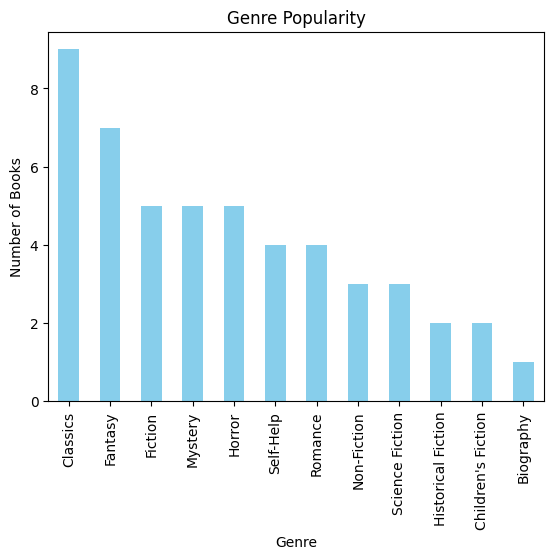

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


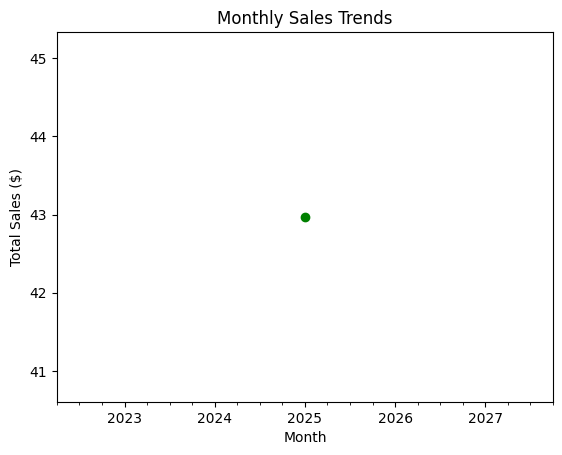

In [14]:
def plot_genre_popularity(book_data):
    genre_counts = book_data['Genre'].value_counts()
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title('Genre Popularity')
    plt.xlabel('Genre')
    plt.ylabel('Number of Books')
    plt.show()

plot_genre_popularity(book_data)

# Function to plot monthly sales trends
def plot_monthly_sales_trends(sales_records):
    sales_df = pd.DataFrame(sales_records)

    sales_df['Date'] = pd.to_datetime(sales_df['Date'])

    sales_df['Month'] = sales_df['Date'].dt.to_period('M')

    monthly_sales = sales_df.groupby('Month')['Total Price'].sum()

    monthly_sales.plot(kind='line', marker='o', color='green')
    plt.title('Monthly Sales Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Sales ($)')
    plt.show()

# Example
plot_monthly_sales_trends(sales_records)

# Error Handling
Implement error handling to prevent negative stock or invalid purchases.

In [15]:
def add_to_cart_with_error_handling(book_id, quantity):
    try:
        if book_id not in book_data['Book ID'].values:
            raise ValueError("Invalid Book ID. Please try again.")

        # Get the book details
        book = book_data[book_data['Book ID'] == book_id].iloc[0]

        # Check if the requested quantity is available in stock
        if quantity > book['Stock']:
            raise ValueError(f"Requested quantity exceeds available stock. Available stock: {book['Stock']}")

        # Add the book to the cart
        cart.append({
            'Book ID': book_id,
            'Title': book['Title'],
            'Author': book['Author'],
            'Genre': book['Genre'],
            'Price': book['Price'],
            'Quantity': quantity,
            'Total Price': book['Price'] * quantity
        })

        book_data.loc[book_data['Book ID'] == book_id, 'Stock'] -= quantity

        print(f"Added {quantity} copies of '{book['Title']}' to the cart.")
    except ValueError as e:
        print(e)

# Example add_to_cart_with_error_handling('BK-1001', 2)
add_to_cart_with_error_handling('BK-1031', 50)

def update_stock_after_purchase_with_error_handling(cart):
    try:
        for item in cart:
            book_id = item['Book ID']
            quantity_purchased = item['Quantity']

            if book_data.loc[book_data['Book ID'] == book_id, 'Stock'].values[0] < quantity_purchased:
                raise ValueError(f"Insufficient stock for book ID {book_id}.")

            book_data.loc[book_data['Book ID'] == book_id, 'Stock'] -= quantity_purchased

        print("Stock updated after purchase.")
    except ValueError as e:
        print(e)

# Example
update_stock_after_purchase_with_error_handling(cart)

Requested quantity exceeds available stock. Available stock: 33
Stock updated after purchase.


# User Interface
Create a menu-driven system with options to browse books, add books to the cart, view purchase history, and rate or review purchased books.

In [16]:
def display_menu():
    print("\n=== Book Store Management System ===")
    print("1. View Available Books")
    print("2. Search Books")
    print("3. Add Book to Cart")
    print("4. View Cart")
    print("5. Checkout")
    print("6. Rate and Review Books")
    print("7. View Sales Reports")
    print("8. Exit")
    return input("Enter your choice (1-8): ")

def main():
    while True:
        choice = display_menu()

        if choice == '1':
            # View Available Books
            print("\n=== Available Books ===")
            view_available_books()

        elif choice == '2':
            # Search Books
            print("\n=== Search Books ===")
            print("1. Search by Title")
            print("2. Search by Author")
            print("3. Search by Genre")
            print("4. Search by Rating")
            search_choice = input("Enter your choice (1-4): ")

            search_value = input("Enter search value: ")
            if search_choice == '1':
                search_books('Title', search_value)
            elif search_choice == '2':
                search_books('Author', search_value)
            elif search_choice == '3':
                search_books('Genre', search_value)
            elif search_choice == '4':
                search_books('Rating', search_value)

        elif choice == '3':
            # Add Book to Cart
            print("\n=== Add Book to Cart ===")
            book_id = input("Enter Book ID: ")
            quantity = int(input("Enter quantity: "))
            add_to_cart(book_id, quantity)

        elif choice == '4':
            # View Cart
            print("\n=== Shopping Cart ===")
            view_cart()

        elif choice == '5':
            # Checkout
            print("\n=== Checkout ===")
            if cart:
                total_price = calculate_total_price(cart)
                print("\nGenerating receipt...")
                generate_receipt(cart, total_price)
                update_stock_after_purchase(cart)
                track_total_sales(cart, total_price)
                cart.clear()
            else:
                print("Your cart is empty!")

        elif choice == '6':
            # Rate and Review Books
            print("\n=== Rate and Review Books ===")
            book_id = input("Enter Book ID: ")
            rating = float(input("Enter rating (1-5): "))
            review = input("Enter your review: ")
            rate_and_review(book_id, rating, review)

        elif choice == '7':
            # View Sales Reports
            print("\n=== Sales Reports ===")
            print("1. Most Sold Books")
            print("2. Genre Analysis")
            report_choice = input("Enter your choice (1-2): ")

            if report_choice == '1':
                # Display top 10 books by negative stock (indicating sales)
                sold_books = book_data.copy()
                sold_books['Sold'] = sold_books['Stock'].apply(lambda x: abs(x) if x < 0 else 0)
                top_sold = sold_books.nlargest(10, 'Sold')[['Title', 'Sold']]
                plt.figure(figsize=(12, 6))
                plt.bar(top_sold['Title'], top_sold['Sold'])
                plt.xticks(rotation=45, ha='right')
                plt.title('Top 10 Most Sold Books')
                plt.xlabel('Book Title')
                plt.ylabel('Number of Books Sold')
                plt.tight_layout()
                plt.show()

            elif report_choice == '2':
                # Display sales by genre
                genre_sales = book_data.groupby('Genre')['Stock'].sum()
                plt.figure(figsize=(10, 6))
                genre_sales.plot(kind='pie', autopct='%1.1f%%')
                plt.title('Sales Distribution by Genre')
                plt.axis('equal')
                plt.show()

        elif choice == '8':
            # Exit
            print("\nThank you for using the Book Store Management System!")
            break

        else:
            print("\nInvalid choice! Please try again.")

        input("\nPress Enter to continue...")

# Run the main program
if __name__ == "__main__":
    main()


=== Book Store Management System ===
1. View Available Books
2. Search Books
3. Add Book to Cart
4. View Cart
5. Checkout
6. Rate and Review Books
7. View Sales Reports
8. Exit

Invalid choice! Please try again.

=== Book Store Management System ===
1. View Available Books
2. Search Books
3. Add Book to Cart
4. View Cart
5. Checkout
6. Rate and Review Books
7. View Sales Reports
8. Exit

Invalid choice! Please try again.

=== Book Store Management System ===
1. View Available Books
2. Search Books
3. Add Book to Cart
4. View Cart
5. Checkout
6. Rate and Review Books
7. View Sales Reports
8. Exit

Invalid choice! Please try again.

=== Book Store Management System ===
1. View Available Books
2. Search Books
3. Add Book to Cart
4. View Cart
5. Checkout
6. Rate and Review Books
7. View Sales Reports
8. Exit

Thank you for using the Book Store Management System!
